# Part 2 import refactored- 3

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table
import seaborn as sns
%matplotlib inline


from preprocess_visuals import ModelComplexityRF, ModelComplexity, get_conv, get_usecols, selectKBest
from preprocess_visuals import add_interactions, scale, plot_box_hist2, col_stats, preprocess, dummies


pd.options.display.max_rows = 160
pd.options.display.max_columns = 200

In [29]:
df = pd.read_csv('data/LoanStats_securev1_2017Q1.csv', skiprows=1, skipfooter=2, 
                 engine='python', usecols=get_usecols(), converters=get_conv())

# dummy encode categorical valriables and impute missing values
df = preprocess(df)
display(df.head(10))

,loan_amnt,term,int_rate,installment,grade,emp_title,annual_inc,loan_status,zip_code,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,application_type,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,cr_history,fico_range_mean,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_joint_Not Verified,verification_status_joint_Source Verified,verification_status_joint_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,emp_length_1 year,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year
0,15000.0,0.0,5.32,451.730011,7.0,0.0,182000.0,0.0,75.0,0.0,0.0,33.553261,68.749359,13.0,0.0,34623.0,33.700001,32.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,233521.0,0.0,1.0,0.0,1.0,24.0,2667.0,59.0,2.0,2.0,12503.0,42.0,102600.0,1.0,6.0,0.0,4.0,17963.0,55203.0,26.000000,0.0,0.0,92.0,508.0,8.0,8.0,5.0,8.0,17.0,0.0,3.0,6.0,7.0,11.0,9.0,10.0,16.0,6.0,13.0,0.0,0.0,2.0,100.000000,0.000000,0.0,0.0,325464.0,50766.0,74600.0,4508.0,42.0,742.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,17000.0,0.0,7.49,528.729980,7.0,0.0,120000.0,0.0,84.0,0.0,0.0,72.000000,89.000000,9.0,1.0,15406.0,31.600000,34.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,290743.0,0.0,2.0,1.0,1.0,9.0,33276.0,86.0,0.0,2.0,5681.0,56.0,48800.0,1.0,0.0,1.0,3.0,32305.0,32394.0,32.200001,0.0,0.0,137.0,119.0,24.0,9.0,2.0,24.0,9.0,0.0,4.0,4.0,5.0,6.0,24.0,6.0,8.0,4.0,9.0,0.0,0.0,1.0,94.099998,20.000000,1.0,0.0,374071.0,48682.0,47800.0,38667.0,11.0,737.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20000.0,0.0,5.32,602.299988,7.0,0.0,120000.0,0.0,92.0,0.0,1.0,33.553261,68.749359,18.0,0.0,2646.0,3.000000,60.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,675385.0,1.0,10.0,1.0,2.0,3.0,672739.0,106.0,1.0,3.0,2075.0,51.0,87400.0,0.0,0.0,2.0,5.0,37521.0,84754.0,3.000000,0.0,0.0,175.0,175.0,9.0,3.0,0.0,9.0,3.0,0.0,3.0,3.0,8.0,12.0,46.0,8.0,14.0,3.0,18.0,0.0,0.0,2.0,100.000000,0.000000,0.0,0.0,688272.0,675385.0,87400.0,600872.0,14.0,772.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,16000.0,1.0,12.74,361.929993,5.0,0.0,130000.0,0.0,57.0,0.0,0.0,42.000000,79.000000,16.0,1.0,8595.0,25.799999,48.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,44263.0,0.0,3.0,1.0,2.0,8.0,35668.0,77.0,2.0,6.0,4566.0,56.0,33300.0,3.0,9.0,6.0,8.0,2766.0,3350.0,58.099998,0.0,0.0,141.0,260.0,10.0,8.0,3.0,23.0,8.0,0.0,2.0,5.0,2.0,12.0,12.0,13.0,33.0,5.0,16.0,0.0,0.0,3.0,97.599998,50.000000,1.0,0.0,79751.0,44263.0,8000.0,46451.0,21.0,682.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,

In [27]:
# display statistics about variables
col_stats(df).sort_values(by='Null Percent', ascending=False)

,dtypes,Null Count,Null Percent,Min,Max,Med,Sqew,unique_counts
columns,,,,,,,,
int_rate,float64,0,0.0,-1.349091,3.318182,0.000000,1.048476,36
int_rate_mths_since_last_record,float64,0,0.0,-2.116683,6.766785,0.000000,1.141963,2875
inq_last_6mths,float64,0,0.0,0.000000,5.000000,0.000000,1.897762,6
loan_amnt_int_rate,float64,0,0.0,-0.780694,5.450717,0.000030,1.573874,10611
loan_amnt_inq_last_6mths,float64,0,0.0,0.000000,20.000000,0.000000,3.361102,1612
term_int_rate,float64,0,0.0,0.000000,3.878598,0.000000,1.642805,33
int_rate_installment,float64,0,0.0,-0.798789,8.515488,0.000000,2.006280,12031
int_rate_grade,float64,0,0.0,-7.164051,2.530670,0.000000,-0.951512,39
int_rate_annual_inc,float64,0,0.0,-1.197368,34.920148,0.000098,3.690954,15706


In [4]:
# split data and train
y = df.loan_status
X = df.drop(columns='loan_status')

# add 2nd degree polynomial interactions
X = add_interactions(X)

In [11]:
# Such a large set of features can cause overfitting and also slow computing
# Use feature selection to select the most important features
X = selectKBest(X, y, 100)

In [12]:
# scale features
x_scaled = scale(X)


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.20, random_state=0)

Missing values for int_rate 0


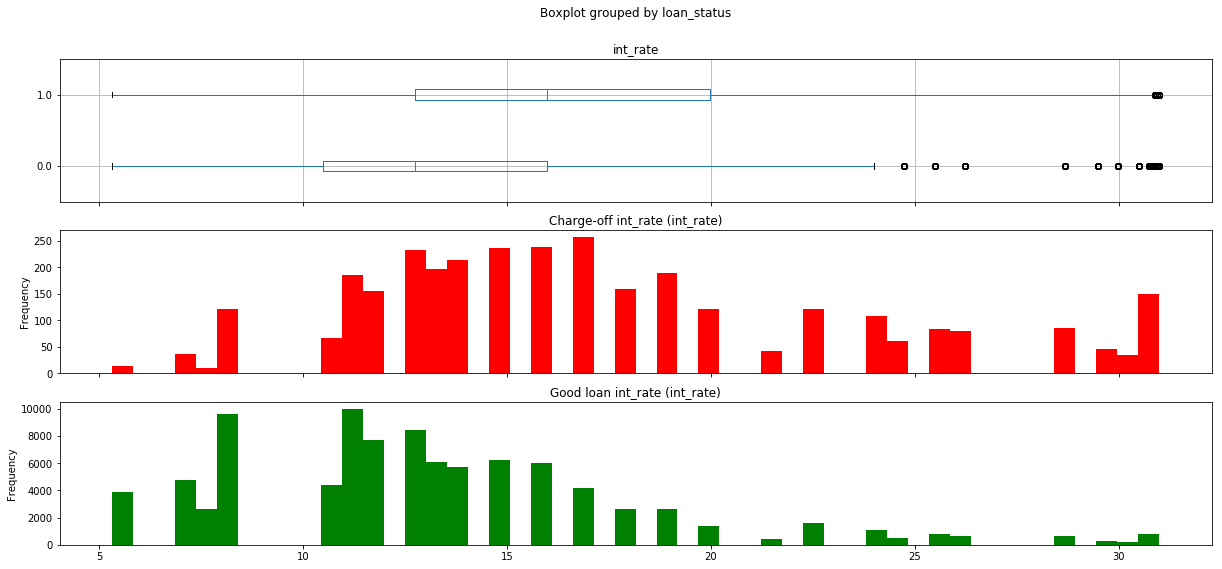

Missing values for grade 0


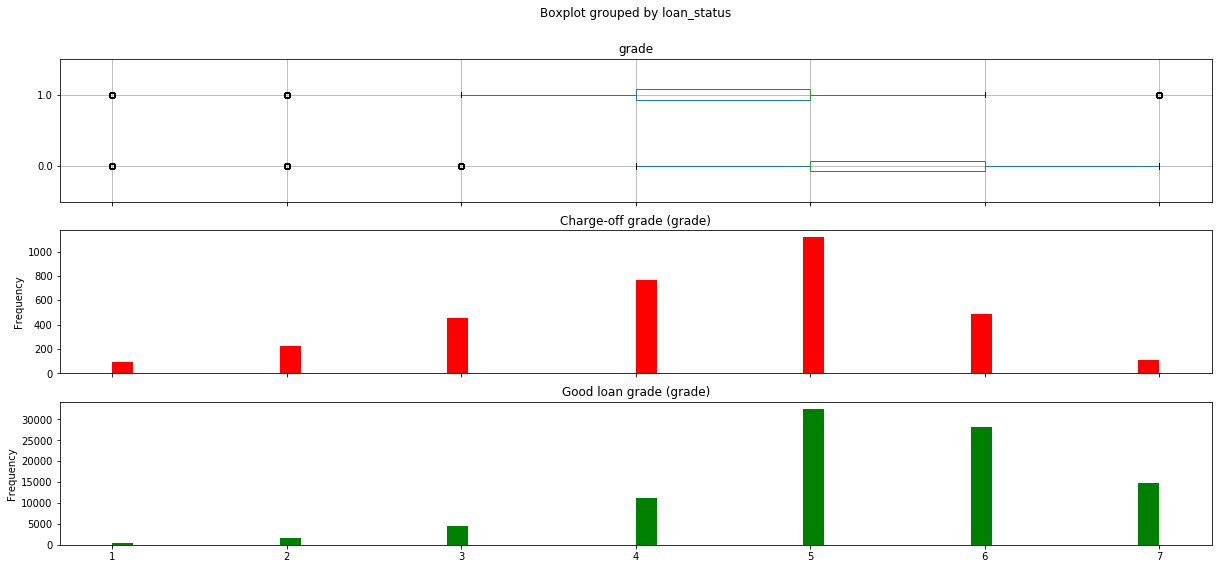

Missing values for inq_last_6mths 0


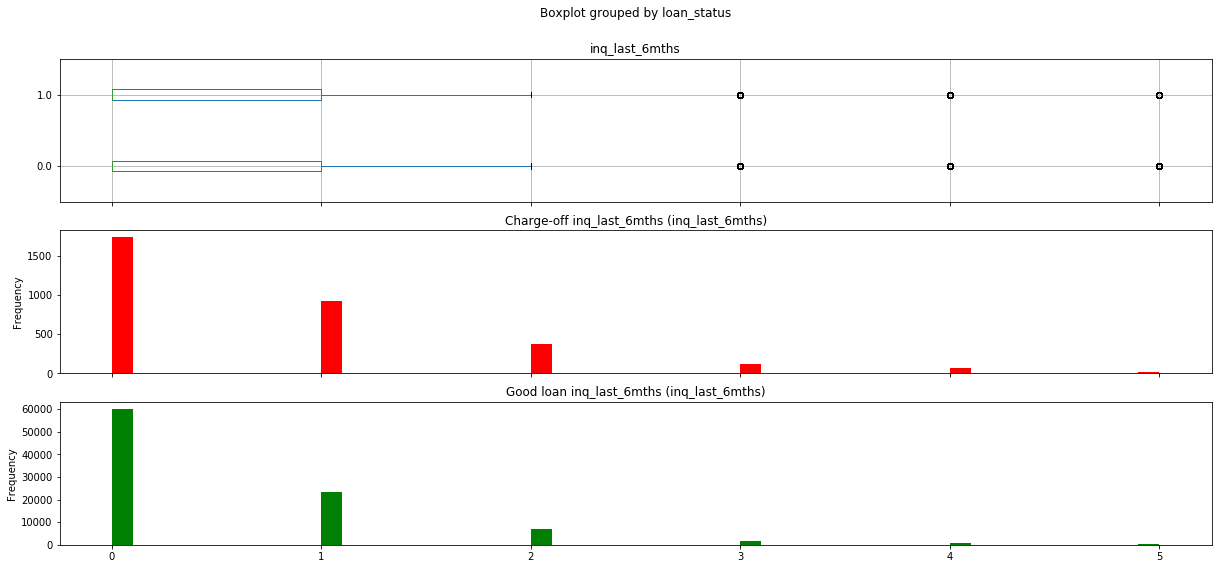

Missing values for loan_amnt_int_rate 0


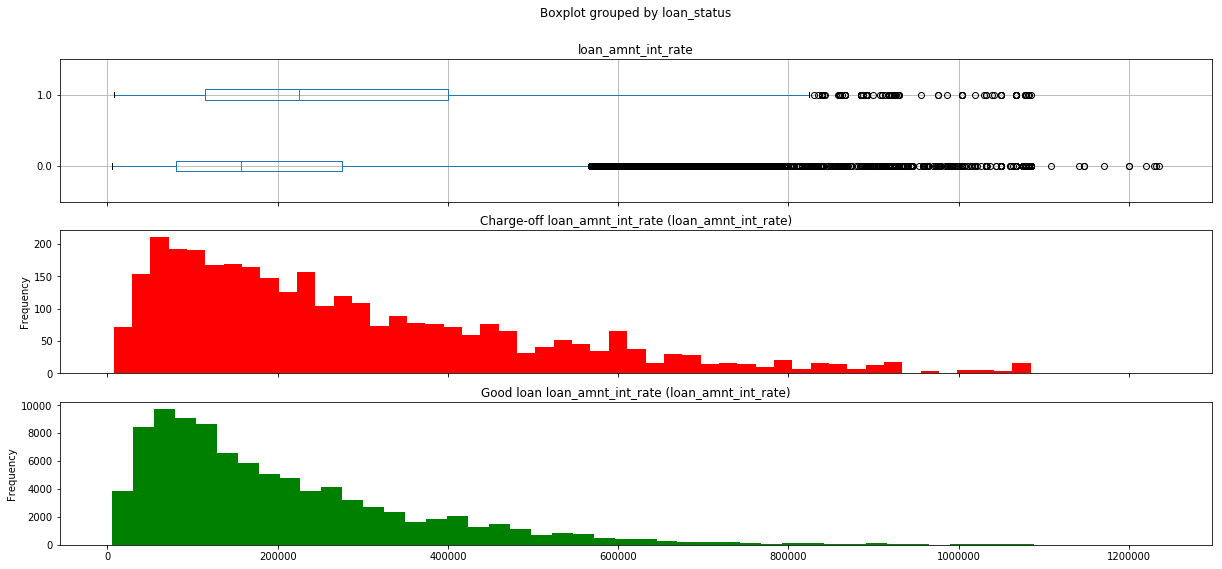

Missing values for loan_amnt_inq_last_6mths 0


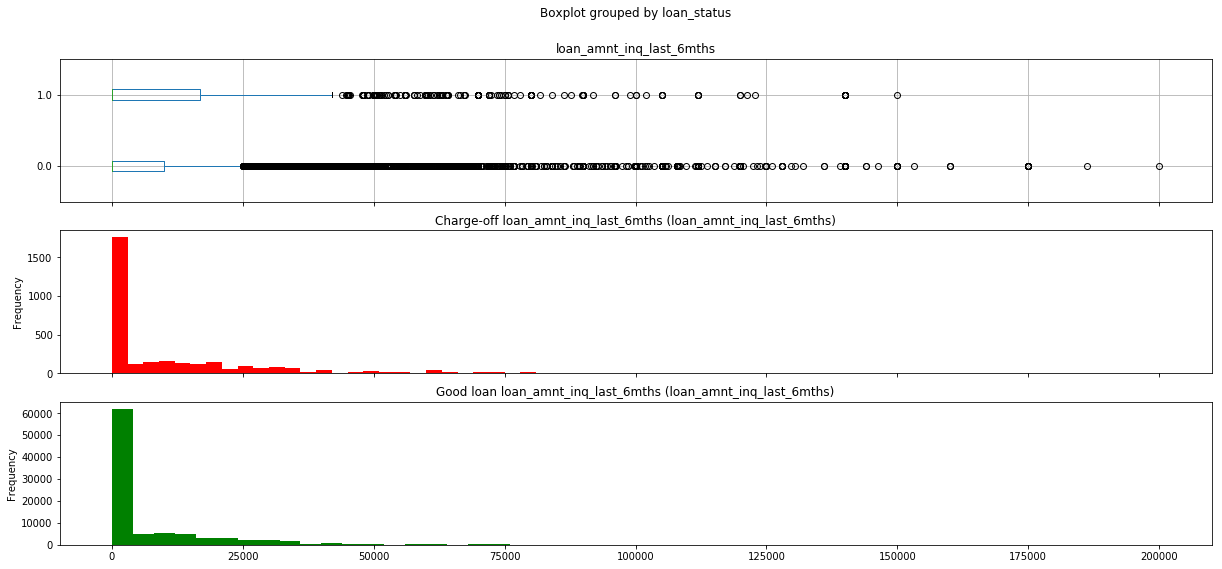

Missing values for term_int_rate 0


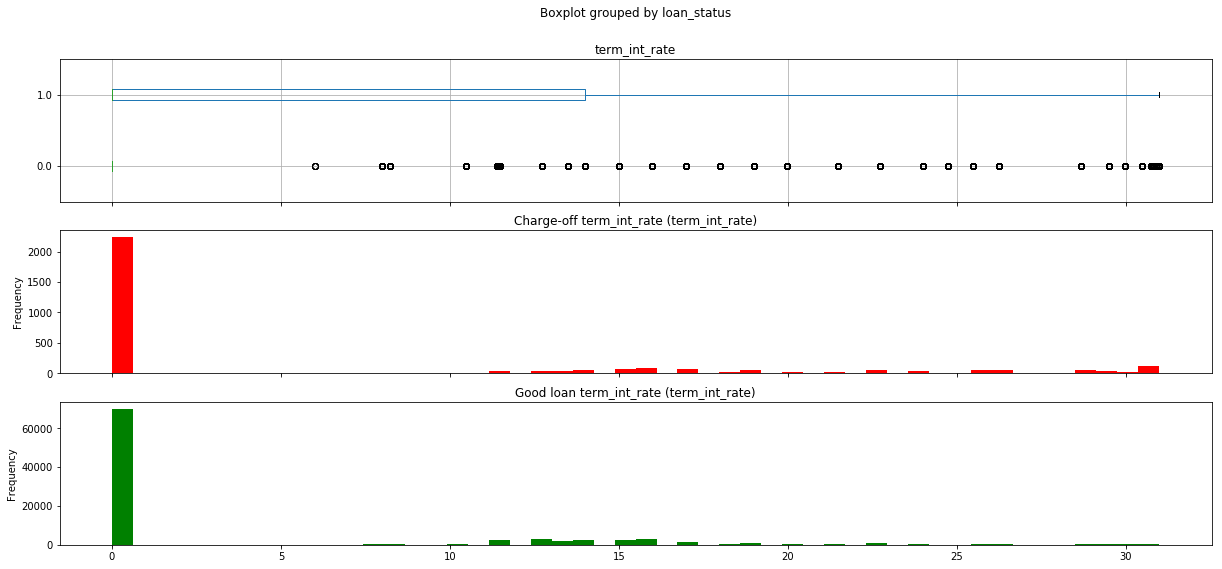

Missing values for int_rate_installment 0


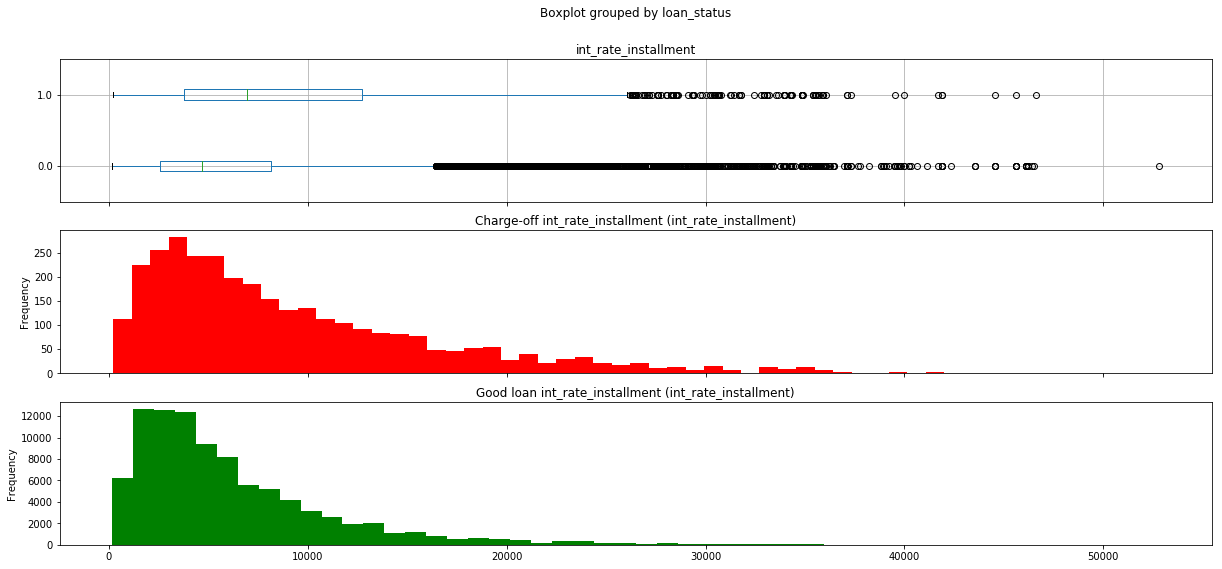

Missing values for int_rate_grade 0


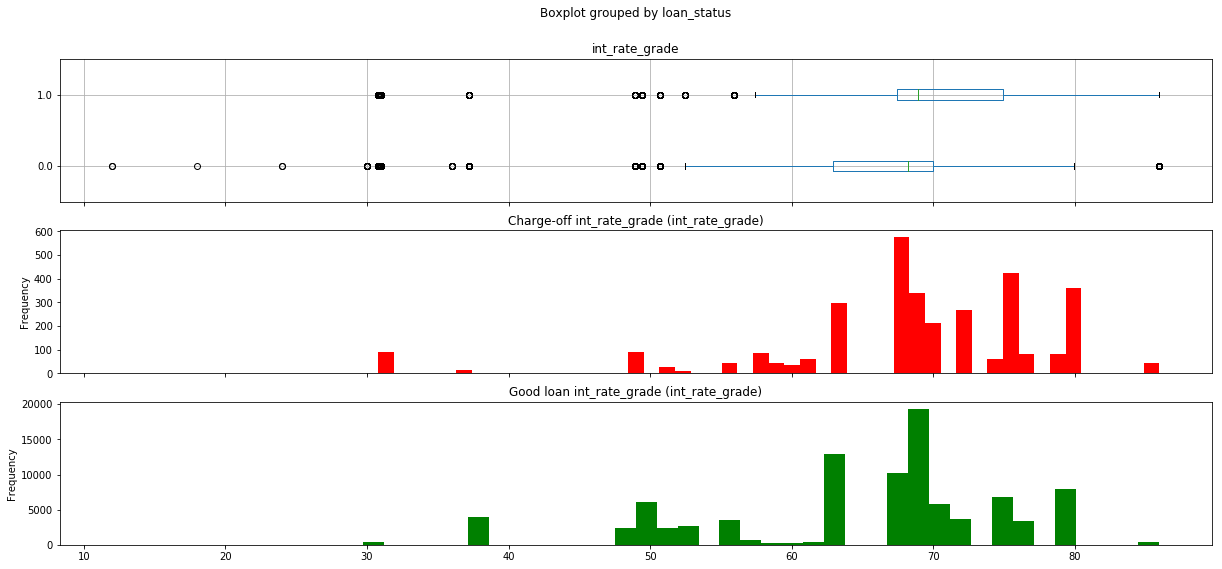

Missing values for int_rate_annual_inc 0


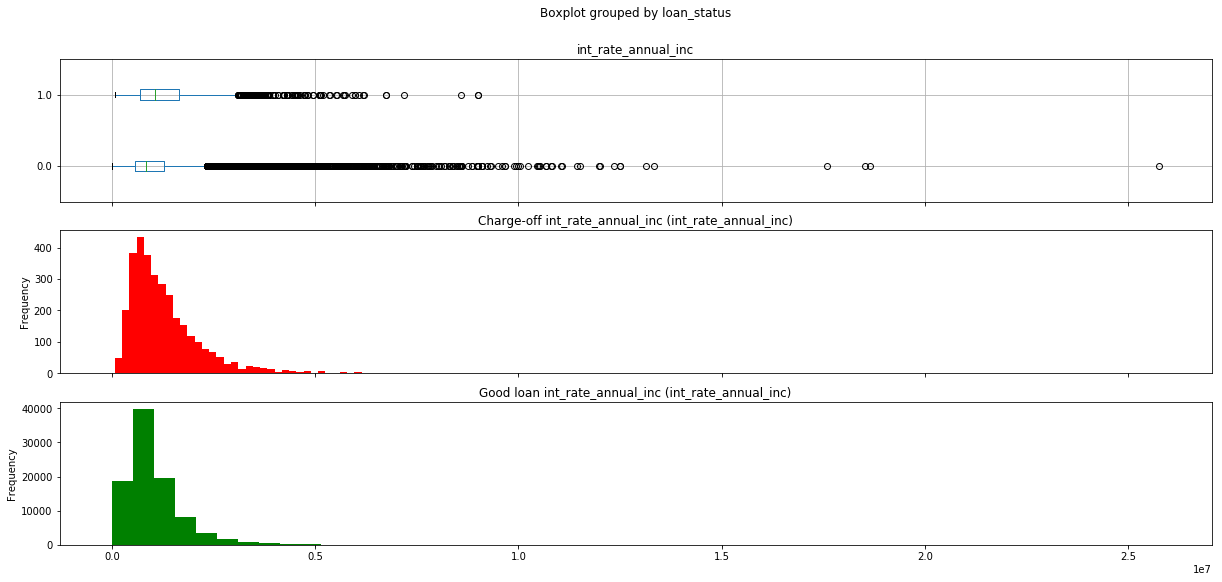

Missing values for int_rate_zip_code 0


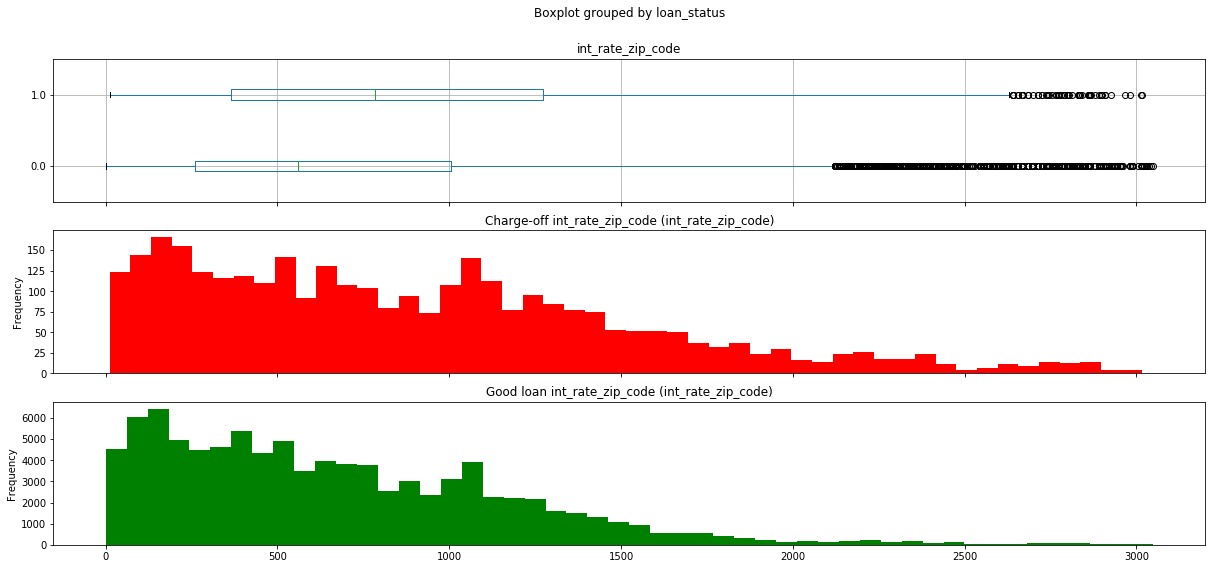

In [17]:
for col in x_scaled.columns.values[:10]:
    plot_box_hist2(X.join(y), col, col, bins=50)

### Train the model

Test score for param= 3 recall= 0.707 std= 0.023


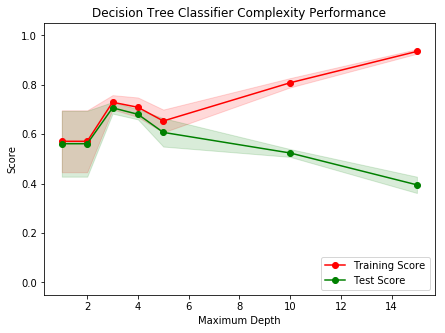

CPU times: user 30.2 s, sys: 643 ms, total: 30.9 s
Wall time: 31.1 s


In [14]:
%%time
ModelComplexity(X_train, y_train)

#print(colnames_selected)

In [ ]:
%%time
ModelComplexityRF(X_train, y_train)

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy', class_weight='balanced', max_depth=1)
#ftwo_scorer = make_scorer(fbeta_score, beta=2)
clf.fit(X_train, y_train)


print(clf.feature_importances_)
y_predicted = clf.predict(X_test_selected)

print("recall:", round(recall_score(y_test, y_predicted), 4))

CPU times: user 7h 15min 41s, sys: 3min 47s, total: 7h 19min 28s
Wall time: 23h 10min 25s


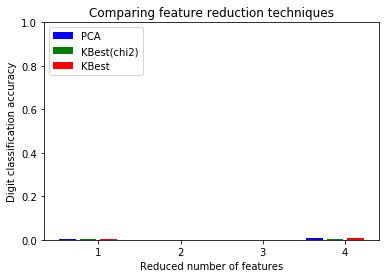

In [46]:
%%time
y = df.loan_status
X = df.drop(columns='loan_status')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

#http://scikit-learn.org/stable/auto_examples/plot_compare_reduction.html#sphx-glr-auto-examples-plot-compare-reduction-py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn.decomposition import PCA, NMF
from sklearn.feature_selection import SelectKBest, chi2

pipe = Pipeline([
    ('reduce_dim', PCA()),
    ('classify', SVC())
])

N_FEATURES_OPTIONS = [1, 2, 3, 4]
C_OPTIONS = [1, 10, 100]
GAMMA_OPTIONS = [1, 10, 100]
KERNEL_OPTIONS= ['linear', 'poly', 'rbf', 'sigmoid']


param_grid = [
    {
        'reduce_dim': [PCA(iterated_power=7)],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'classify__C': C_OPTIONS
    },
    {
        'reduce_dim': [SelectKBest(chi2), SelectKBest()],
        'reduce_dim__k': N_FEATURES_OPTIONS,
        'classify__C': C_OPTIONS
    },
]
reducer_labels = ['PCA', 'KBest(chi2)', 'KBest']

grid = GridSearchCV(pipe, cv=3, n_jobs=1, param_grid=param_grid, scoring='recall')
grid.fit(X_train, y_train)

mean_scores = np.array(grid.cv_results_['mean_test_score'])
# scores are in the order of param_grid iteration, which is alphabetical
mean_scores = mean_scores.reshape(len(C_OPTIONS), -1, len(N_FEATURES_OPTIONS))
# select score for best C
mean_scores = mean_scores.max(axis=0)
bar_offsets = (np.arange(len(N_FEATURES_OPTIONS)) *
               (len(reducer_labels) + 1) + .5)

plt.figure()
COLORS = 'bgrcmyk'
for i, (label, reducer_scores) in enumerate(zip(reducer_labels, mean_scores)):
    plt.bar(bar_offsets + i, reducer_scores, label=label, color=COLORS[i])

plt.title("Comparing feature reduction techniques")
plt.xlabel('Reduced number of features')
plt.xticks(bar_offsets + len(reducer_labels) / 2, N_FEATURES_OPTIONS)
plt.ylabel('Digit classification accuracy')
plt.ylim((0, 1))
plt.legend(loc='upper left')

In [ ]:
# re-plot the normalized data
# for col in dfr.columns.values:
#     plot_box_hist2(X_train_selected, col, col, bins=50)

In [ ]:
pd.options.display.max_colwidth=1000
pd.DataFrame(grid.cv_results_)#.loc[grid.best_index_,:]

In [ ]:
mean_scores = np.array(grid.cv_results_['mean_test_score'])
# scores are in the order of param_grid iteration, which is alphabetical
mean_scores = mean_scores.reshape(len(C_OPTIONS), -1, len(N_FEATURES_OPTIONS))
## select score for best C
#mean_scores = mean_scores.max(axis=0)

mean_scores

In [156]:
%%time
y = df.loan_status
X = df.drop(columns='loan_status')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

#http://scikit-learn.org/stable/auto_examples/plot_compare_reduction.html#sphx-glr-auto-examples-plot-compare-reduction-py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.decomposition import PCA, NMF
from sklearn.feature_selection import SelectKBest, chi2

pipe = Pipeline([
    ('reduce_dim', PCA()),
    ('classify', RandomForestClassifier(criterion='entropy', class_weight='balanced', random_state=7, 
                                        max_depth=3))
])

N_FEATURES_OPTIONS = [3, 10, 20, 30]

MAX_DEPTH_OPTIONS= [2, 3, 4]
N_ESTIMATORS_OPTIONS = [50, 75]

param_grid = [
    {
        'reduce_dim': [SelectKBest()],
        'reduce_dim__k': N_FEATURES_OPTIONS,
        'classify__max_depth': MAX_DEPTH_OPTIONS,
        'classify__n_estimators': N_ESTIMATORS_OPTIONS
        
    },
]

grid = GridSearchCV(pipe, cv=3, n_jobs=1, param_grid=param_grid, scoring='recall')
grid.fit(X_train, y_train)

CPU times: user 1min 49s, sys: 5.02 s, total: 1min 54s
Wall time: 1min 42s


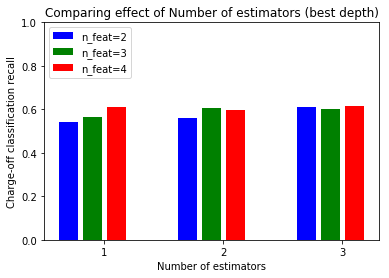

In [154]:
depth_labels = ['n_feat=2', 'n_feat=3', 'n_feat=4'] #['1', '2', '3', '4']

mean_scores = np.array(grid.cv_results_['mean_test_score'])
# scores are in the order of param_grid iteration, which is alphabetical
mean_scores = mean_scores.reshape(len(MAX_DEPTH_OPTIONS), -1, len(N_FEATURES_OPTIONS))
# select score for best K
mean_scores = mean_scores.max(axis=0)
bar_offsets = (np.arange(len(N_ESTIMATORS_OPTIONS)) *
               (len(reducer_labels) + 1) + .5)

plt.figure();
COLORS = 'bgrcmyk'
for i, (label, depth_scores) in enumerate(zip(depth_labels, mean_scores)):
    plt.bar(bar_offsets + i, depth_scores, label=label, color=COLORS[i])

plt.title("Comparing effect of Number of estimators (best depth)")
plt.xlabel('Number of estimators')
plt.xticks(bar_offsets + len(depth_labels) / 2, N_ESTIMATORS_OPTIONS)
plt.ylabel('Charge-off classification recall')
plt.ylim((0, 1))
plt.legend(loc='upper left');

In [155]:
mean_scores = np.array(grid.cv_results_['mean_test_score'])
mean_scores = mean_scores.reshape(len(MAX_DEPTH_OPTIONS), -1, len(N_FEATURES_OPTIONS))

mean_scores

array([[[0.54309981, 0.4783858 , 0.54309981],
        [0.54309981, 0.52437202, 0.56568606],
        [0.54309981, 0.52437202, 0.56568606]],

       [[0.54309981, 0.5255054 , 0.5921665 ],
        [0.56568606, 0.52164609, 0.56373897],
        [0.56568606, 0.52164609, 0.61593121]],

       [[0.54309981, 0.55984479, 0.60970732],
        [0.56568606, 0.6073538 , 0.60230115],
        [0.60891148, 0.5964501 , 0.61087133]]])

In [147]:
mean_scores.max(0)

array([[0.65797817, 0.65797817, 0.5750321 , 0.5956534 ],
       [0.6887422 , 0.6887422 , 0.58278261, 0.61240646],
       [0.66615595, 0.6887422 , 0.56407949, 0.6030549 ],
       [0.6887422 , 0.6887422 , 0.58165944, 0.60226883]])

In [141]:
pd.DataFrame(grid.cv_results_)[['mean_test_score','param_reduce_dim__k', 'param_classify__max_depth','param_classify__n_estimators']]

/Users/aberenyi/anaconda2/envs/Py36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/aberenyi/anaconda2/envs/Py36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/aberenyi/anaconda2/envs/Py36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kw

,mean_test_score,param_reduce_dim__k,param_classify__max_depth,param_classify__n_estimators
0,0.633055,1,1,10
1,0.543100,2,1,10
2,0.575032,3,1,10
3,0.543100,4,1,10
4,0.633055,1,1,20
5,0.495929,2,1,20
6,0.575032,3,1,20
7,0.501776,4,1,20
8,0.633055,1,1,25
9,0.522438,2,1,25


In [133]:
mean_scores.max(axis=0)

array([0.6887422 , 0.6887422 , 0.58278261, 0.61240646])

- Best result: DT, GINI, cv=3, class_weight='balanced'
- Test score for max_depth: 4 recall: 0.693 std: 0.011
- Test score for max_depth: 3 recall: 0.707 std: 0.023, Poly Feat, 100 best

- Test score R.F. criterion= entropy for max_depth= 5 f2= 0.236 std= 0.002
- Test score D.T. criterion= entropy for max_depth= 1 f2= 0.226 std= 0.011



            